In [344]:
from bs4 import BeautifulSoup
#from fontTools.ttLib import TTFont
import requests
import time
from openpyxl import Workbook
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

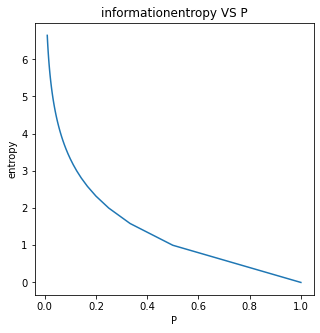

In [357]:
n=100
x=[1/i for i in range(1,101)]
y=[(1/i)*np.log2(1/i)*(-i) for i in range(1,101)]
# y=[(x*np.log2(x))*(-n)]
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,y)
ax.set_title('informationentropy VS P')
ax.set_xlabel('P')
ax.set_ylabel('entropy')
plt.show()

-----sklearn: 0.421875
[0.    0.25  0.375 0.625 0.75  0.75  1.   ] [0.   0.25 0.25 0.25 0.5  1.   1.  ] [1.9  0.9  0.8  0.7  0.66 0.4  0.1 ]


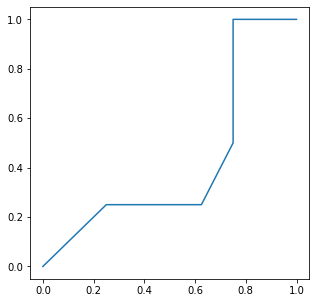

In [364]:
import numpy as np 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
y = np.array([1,0,0,0,1,0,1,0,1,0,0,0]) 
pred = np.array([0.9, 0.8, 0.3, 0.1,0.4,0.9,0.66,0.7,0.4,0.9,0.66,0.7])
fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1)
print("-----sklearn:",auc(fpr, tpr))
print(fpr,tpr,thresholds)
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(fpr,tpr)
plt.show()

In [356]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title'

In [350]:
x

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664,
 0.04,
 0.038461538461538464,
 0.037037037037037035,
 0.03571428571428571,
 0.034482758620689655,
 0.03333333333333333,
 0.03225806451612903,
 0.03125,
 0.030303030303030304,
 0.029411764705882353,
 0.02857142857142857,
 0.027777777777777776,
 0.02702702702702703,
 0.02631578947368421,
 0.02564102564102564,
 0.025,
 0.024390243902439025,
 0.023809523809523808,
 0.023255813953488372,
 0.022727272727272728,
 0.022222222222222223,
 0.021739130434782608,
 0.02127659574468085,
 0.020833333333333332,
 0.02040816326530612,
 0.02,
 0.0196078431372549,
 0.019230769230769232,
 0.01886792452830

In [36]:
#房源详情页：https://bj.lianjia.com/zufang/BJ2382463517803954176.htmlhelp(bs_t.find)   
#dir(c1)   
house_code=re.compile(r' data-house_code="BJ\d*"')
ss='<div class="content__list--item" data-ad_code="0" data-ad_type="0" data-bid_version="" data-brand_code="200301001000" data-c_type="1" data-click_position="7" data-distribution_type="203500000001" data-el="listItem" data-event_action="click_position=7" data-event_id="21333" data-event_position="click_position" data-event_send="no" data-fb_expo_id="400054531330797578" data-house_code="BJ2384107270826106880" data-position="7" data-strategy_id="" data-t="default" data-total="21366">'
house_code.findall(ss)

[' data-house_code="BJ2384107270826106880"']

In [307]:
##https://bj.lianjia.com/zufang/pg1rt200600000001l1/#contentList
##https://m.lianjia.com/chuzu/bj/zufang/rt200600000001l1/
url_t='https://bj.lianjia.com/zufang/pg1rt200600000001l1/#contentList'
headers = {
        'Accept': 'application/json',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
        'Connection': 'keep-alive',
        'Cookie':  'lianjia_uuid=99f1e6f8-cc8d-435a-87f7-b0d360d6d5b2; _smt_uid=5cea4b11.2a13524e; _ga=GA1.2.1298220716.1558858518; _jzqa=1.4022354363956294700.1558858514.1559205609.1590936861.3; select_city=110000; _gid=GA1.2.1581606667.1610113282; csrfSecret=kWfghzqtT6sm4JCVrOoNXvhR; activity_ke_com=undefined; lianjia_ssid=be23dce7-ea64-4607-93d0-18e4ca13144c; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22%24device_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E4%BB%98%E8%B4%B9%E5%B9%BF%E5%91%8A%E6%B5%81%E9%87%8F%22%2C%22%24latest_referrer%22%3A%22%22%2C%22%24latest_referrer_host%22%3A%22%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC_%E7%9B%B4%E6%8E%A5%E6%89%93%E5%BC%80%22%2C%22%24latest_utm_source%22%3A%22guanwang%22%2C%22%24latest_utm_medium%22%3A%22pinzhuan%22%2C%22%24latest_utm_campaign%22%3A%22wybeijing%22%2C%22%24latest_utm_content%22%3A%22biaotimiaoshu%22%2C%22%24latest_utm_term%22%3A%22biaoti%22%7D%7D; Hm_lvt_9152f8221cb6243a53c83b956842be8a=1610113611; Hm_lpvt_9152f8221cb6243a53c83b956842be8a=1610113611; srcid=eyJ0Ijoie1wiZGF0YVwiOlwiMzQ3YjBkNjQzM2FlZDAyMTM2Yzg4Y2IwMTNhMjJkNGViODlhMGZhMGViYjc3NDdkZDdmYjFjOWNkN2E1MTk2ODg2ODYxOWM1MjA5MjhmNjU2MTgzMmFjZTRkZjNiYWU2M2E0YzBlZTVmOGQyNmQ3YzkxNzAwYTI3Y2E2MjZjNDU3YTUwMzZmMjAxNTBiYTU4M2QyMjA0ZWYxZjQ3NjY4NDEwZmY4ZmYyMDkxODJmMTljNmNmMGQzMjQ1NzYwZjZmYTkzOThiODI4NTdmZmQ1NmM4MzU5MTFmODUyN2JjY2Q3OGU5M2Q4YWFlNDk0OTk1YTdkYTk3ZDI3MmNjYTQzOTcyMTQ3ZDc1OGFmMGY5NmNlYjczZGFjMTBjZDdkY2Q2OGZjNjE0NjI4YmYxYmY2NWM1YWE2YTQyMmJjNWU4MmI3YWM3M2M3ZWYwMjc0MTVlZjAxNjNmZDQ1NTFkYWIyNFwiLFwia2V5X2lkXCI6XCIxXCIsXCJzaWduXCI6XCIyMDY3Zjk2ZlwifSIsInIiOiJodHRwczovL20ubGlhbmppYS5jb20vY2h1enUvYmovenVmYW5nL3J0MjAwNjAwMDAwMDAxbDEvIiwib3MiOiJ3ZWIiLCJ2IjoiMC4xIn0=',
        'Host': 'bj.lianjia.com',
        'Referer': 'https://bj.lianjia.com/zufang/pg1rt200600000001l1/',##'https://m.lianjia.com/chuzu/bj/zufang/rt200600000001l1/', ##https://bj.lianjia.com/zufang/pg1rt200600000001l1/
        #'Upgrade-Insecure-Requests': '1',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
        }
html_t = requests.get(url_t, headers=headers).text
#print(html_t)
bs_t = BeautifulSoup(html_t,'lxml')
#print(bs_t)
c1 = bs_t.select('div[data-house_code]')
c1[1].attrs['data-house_code']

print([cc1.attrs['data-house_code'] for cc1 in c1])

['BJ2689235322717880320', 'BJ2575359684811177984', 'BJ2382463517803954176', 'BJ2586027472319954944', 'BJ2589951149197238272', 'BJ2469462190919254016', 'BJ2541012229143134208', 'BJ2593459908653350912', 'BJ2652808329029484544', 'BJ2549072201471238144', 'BJ2656563454663458816', 'BJ2480409517507223552', 'BJ2560743238168215552', 'BJ2593244033455226880', 'BJ2529766358120939520', 'BJ2560802781674086400', 'BJ2678960503358750720', 'BJ2583284453883248640', 'BJ2576842214793543680', 'BJ2589057740752297984', 'BJ2589108295671758848', 'BJ2582733608188395520', 'BJ2564361724560154624', 'BJ2566648870117580800', 'BJ2562124551073316864', 'BJ2664398626096422912', 'BJ2569370896045178880', 'BJ2673020576842653696', 'BJ2549285702399696896', 'BJ2683306053155684352']


In [308]:
def get_lianjia_house_code():
    house_code_data=[]
    print('程序开始时间{}'.format(time.time()))
    for i in range(1,101):
        time.sleep(1)
        url='https://bj.lianjia.com/zufang/pg'+str(i)+'rt200600000001l1/#contentList'
        print(url)
        headers = {
        'Accept': 'application/json',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
        'Connection': 'keep-alive',
        'Cookie':  'lianjia_uuid=99f1e6f8-cc8d-435a-87f7-b0d360d6d5b2; _smt_uid=5cea4b11.2a13524e; _ga=GA1.2.1298220716.1558858518; _jzqa=1.4022354363956294700.1558858514.1559205609.1590936861.3; select_city=110000; _gid=GA1.2.1581606667.1610113282; csrfSecret=kWfghzqtT6sm4JCVrOoNXvhR; activity_ke_com=undefined; lianjia_ssid=be23dce7-ea64-4607-93d0-18e4ca13144c; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22%24device_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E4%BB%98%E8%B4%B9%E5%B9%BF%E5%91%8A%E6%B5%81%E9%87%8F%22%2C%22%24latest_referrer%22%3A%22%22%2C%22%24latest_referrer_host%22%3A%22%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC_%E7%9B%B4%E6%8E%A5%E6%89%93%E5%BC%80%22%2C%22%24latest_utm_source%22%3A%22guanwang%22%2C%22%24latest_utm_medium%22%3A%22pinzhuan%22%2C%22%24latest_utm_campaign%22%3A%22wybeijing%22%2C%22%24latest_utm_content%22%3A%22biaotimiaoshu%22%2C%22%24latest_utm_term%22%3A%22biaoti%22%7D%7D; Hm_lvt_9152f8221cb6243a53c83b956842be8a=1610113611; Hm_lpvt_9152f8221cb6243a53c83b956842be8a=1610113611; srcid=eyJ0Ijoie1wiZGF0YVwiOlwiMzQ3YjBkNjQzM2FlZDAyMTM2Yzg4Y2IwMTNhMjJkNGViODlhMGZhMGViYjc3NDdkZDdmYjFjOWNkN2E1MTk2ODg2ODYxOWM1MjA5MjhmNjU2MTgzMmFjZTRkZjNiYWU2M2E0YzBlZTVmOGQyNmQ3YzkxNzAwYTI3Y2E2MjZjNDU3YTUwMzZmMjAxNTBiYTU4M2QyMjA0ZWYxZjQ3NjY4NDEwZmY4ZmYyMDkxODJmMTljNmNmMGQzMjQ1NzYwZjZmYTkzOThiODI4NTdmZmQ1NmM4MzU5MTFmODUyN2JjY2Q3OGU5M2Q4YWFlNDk0OTk1YTdkYTk3ZDI3MmNjYTQzOTcyMTQ3ZDc1OGFmMGY5NmNlYjczZGFjMTBjZDdkY2Q2OGZjNjE0NjI4YmYxYmY2NWM1YWE2YTQyMmJjNWU4MmI3YWM3M2M3ZWYwMjc0MTVlZjAxNjNmZDQ1NTFkYWIyNFwiLFwia2V5X2lkXCI6XCIxXCIsXCJzaWduXCI6XCIyMDY3Zjk2ZlwifSIsInIiOiJodHRwczovL20ubGlhbmppYS5jb20vY2h1enUvYmovenVmYW5nL3J0MjAwNjAwMDAwMDAxbDEvIiwib3MiOiJ3ZWIiLCJ2IjoiMC4xIn0=',
        'Host': 'bj.lianjia.com',
        'Referer': 'https://bj.lianjia.com/zufang/pg1rt200600000001l1/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
        }
        html = requests.get(url, headers=headers).text
        bs = BeautifulSoup(html,'lxml')
        bs_house_code_list = bs.select('div[data-house_code]')
        ## 通过属性值获取房源编号,不使用正则
        ##house_code_re =re.compile(r' data-house_code="BJ\d*"')
        house_code_data=house_code_data+[i.attrs['data-house_code'] for i in bs_house_code_list]
    print('程序结束时间{}'.format(time.time()))
    return house_code_data

if __name__ == '__main__':
    house_code_data_2 = get_lianjia_house_code()

程序开始时间1610202248.5374432
https://bj.lianjia.com/zufang/pg1rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg2rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg3rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg4rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg5rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg6rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg7rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg8rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg9rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg10rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg11rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg12rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg13rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg14rt200600000001l1/#contentList
https://bj.lianjia.com/zufang/pg15rt200600000001l1/#contentList
https://bj.lianjia.com/z

In [321]:
t=set(house_code_data_2)
[for i ]

BJ2679531318303801344
BJ2678791546911850496
BJ2563044948152680448
BJ2643331250043232256
BJ2591847283658063872
BJ2558037292723732480
BJ2678047126939762688
BJ2510186322338258944
BJ2534038916927848448
BJ2678947342891089920
BJ2678939814618996736
BJ2679011059972440064
BJ2684764377516875776
BJ2680924877552631808
BJ2544062436240539648
BJ2542667679266258944
BJ2390340369670733824
BJ2529061405131276288
BJ2500644128375701504
BJ2678816102775537664
BJ2554175974048530432
BJ2480409517507223552
BJ2678264152636014592
BJ2290339915302977536
BJ2551214840446459904
BJ2590520884226179072
BJ2678775807400214528
BJ2649890432225918976
BJ2417909356260491264
BJ2657057557659009024
BJ2679071620202766336
BJ2557228106113368064
BJ2576609524790607872
BJ2563019781699534848
BJ2569421666141093888
BJ2679496216475615232
BJ2680946632283406336
BJ2563552188311797760
BJ2678238475148328960
BJ2382463517803954176
BJ2642827247760973824
BJ2583284453883248640
BJ2679077319976689664
BJ2643517905202839552
BJ2669419314637455360
BJ20709127

In [ ]:

def get_lianjia_house_code():
    house_code_data=[]
    for i in range(1,101):
        time.sleep(40)
        url='https://bj.lianjia.com/zufang/pg'+str(i)+'rt200600000001l1/#contentList'
        headers = {
        'Accept': 'application/json',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
        'Connection': 'keep-alive',
        'Cookie':  'lianjia_uuid=99f1e6f8-cc8d-435a-87f7-b0d360d6d5b2; _smt_uid=5cea4b11.2a13524e; _ga=GA1.2.1298220716.1558858518; _jzqa=1.4022354363956294700.1558858514.1559205609.1590936861.3; select_city=110000; _gid=GA1.2.1581606667.1610113282; csrfSecret=kWfghzqtT6sm4JCVrOoNXvhR; activity_ke_com=undefined; lianjia_ssid=be23dce7-ea64-4607-93d0-18e4ca13144c; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22%24device_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E4%BB%98%E8%B4%B9%E5%B9%BF%E5%91%8A%E6%B5%81%E9%87%8F%22%2C%22%24latest_referrer%22%3A%22%22%2C%22%24latest_referrer_host%22%3A%22%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC_%E7%9B%B4%E6%8E%A5%E6%89%93%E5%BC%80%22%2C%22%24latest_utm_source%22%3A%22guanwang%22%2C%22%24latest_utm_medium%22%3A%22pinzhuan%22%2C%22%24latest_utm_campaign%22%3A%22wybeijing%22%2C%22%24latest_utm_content%22%3A%22biaotimiaoshu%22%2C%22%24latest_utm_term%22%3A%22biaoti%22%7D%7D; Hm_lvt_9152f8221cb6243a53c83b956842be8a=1610113611; Hm_lpvt_9152f8221cb6243a53c83b956842be8a=1610113611; srcid=eyJ0Ijoie1wiZGF0YVwiOlwiMzQ3YjBkNjQzM2FlZDAyMTM2Yzg4Y2IwMTNhMjJkNGViODlhMGZhMGViYjc3NDdkZDdmYjFjOWNkN2E1MTk2ODg2ODYxOWM1MjA5MjhmNjU2MTgzMmFjZTRkZjNiYWU2M2E0YzBlZTVmOGQyNmQ3YzkxNzAwYTI3Y2E2MjZjNDU3YTUwMzZmMjAxNTBiYTU4M2QyMjA0ZWYxZjQ3NjY4NDEwZmY4ZmYyMDkxODJmMTljNmNmMGQzMjQ1NzYwZjZmYTkzOThiODI4NTdmZmQ1NmM4MzU5MTFmODUyN2JjY2Q3OGU5M2Q4YWFlNDk0OTk1YTdkYTk3ZDI3MmNjYTQzOTcyMTQ3ZDc1OGFmMGY5NmNlYjczZGFjMTBjZDdkY2Q2OGZjNjE0NjI4YmYxYmY2NWM1YWE2YTQyMmJjNWU4MmI3YWM3M2M3ZWYwMjc0MTVlZjAxNjNmZDQ1NTFkYWIyNFwiLFwia2V5X2lkXCI6XCIxXCIsXCJzaWduXCI6XCIyMDY3Zjk2ZlwifSIsInIiOiJodHRwczovL20ubGlhbmppYS5jb20vY2h1enUvYmovenVmYW5nL3J0MjAwNjAwMDAwMDAxbDEvIiwib3MiOiJ3ZWIiLCJ2IjoiMC4xIn0=',
        'Host': 'bj.lianjia.com',
        'Referer': 'https://bj.lianjia.com/zufang/pg1rt200600000001l1/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
        }
        html = requests.get(url, headers=headers).text
        bs = BeautifulSoup(html,'lxml')
        c1 = bs.find('div',id='content') 
        
        ## 通过正则获取房源编号
        house_code_re =re.compile(r' data-house_code="BJ\d*"')
        return house_code_data+house_code_re.findall(str(c1))

In [5]:
def get_content():
    wb = Workbook()
    sheet = wb.active
    sheet.title = '大众点评成都咖啡店650家信息'
    sheet['A1'] = 'name'
    sheet['B1'] = 'address'
    sheet['C1'] = 'mean-price'
    sheet['D1'] = 'review-num'
    sheet['E1'] = 'taste-num'
    sheet['F1'] = 'envir-num'
    sheet['G1'] = 'service-num'
    sheet['H1'] = 'recommend'
    
    #首先获取大众点评网页数据，这里只爬取了前45页
    for i in range(1,51):  
        time.sleep(40)
        url = 'http://www.dianping.com/beijing/ch50/g33955p' + str(i)
        headers = {
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding': 'gzip, deflate',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
        'Connection': 'keep-alive',
        'Cookie':  '_lxsdk_cuid=168659c74ccc8-0010543636dd67-10346654-384000-168659c74ccc8; _lxsdk=168659c74ccc8-0010543636dd67-10346654-384000-168659c74ccc8; s_ViewType=10; fspop=test; cy=2; cye=beijing; _lx_utm=utm_source%3DBaidu%26utm_medium%3Dorganic; Hm_lvt_602b80cf8079ae6591966cc70a3940e7=1610107601; _hc.v=47327fbb-5a17-2d28-e29b-204802ea721b.1610107601; _lxsdk_s=176e1e43e75-33e-ee4-79c%7C%7C207; Hm_lpvt_602b80cf8079ae6591966cc70a3940e7=1610107914',
        'Host': 'www.dianping.com',
        'Referer': 'http://www.dianping.com/',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
        }
        html = requests.get(url, headers=headers).text
#         #下面对加密文本进行解码替换:
#         for code,value in font_name.items():  
#             code_str = code 
#             text = value
#         #再在html文本中进行对比，如果文本中的编码字符与字典中的解码字符一致，就进行替换
#             if code_str in html:
#                 html = html.replace(code_str,text)
                
        try:
            #接着对网页进行解析，提取需要的数据
            bs = BeautifulSoup(html,'lxml')
            coffee_info = bs.find('div', id='shop-all-list')    
            shops = coffee_info.find_all('li', class_="")
            #依次提取每家店的店名、地址、人均消费、评论数、各项评分、推荐菜品
            for shop in shops:
                store_name = shop.find('h4').get_text()
                address = shop.find('span', class_='addr').get_text()
                mean_price = shop.find('a', class_='mean-price')
                #这里存在部分店铺没有人均价格的情况，要分开讨论
                if mean_price.find('b') == None:
                    price = 'NaN'
                else:
                    price = mean_price.find('b').get_text()
                    price = price.replace(' ', '')
                #点评数
                review = shop.find('a', class_='review-num')
                review_num = review.find('b').get_text()
                review_num = review_num.replace('\n', '')  
                #口味、环境、服务评分
                shop_num = shop.find('span', class_='comment-list')
                taste = shop_num.find_all('b')[0].get_text()
                taste = taste.replace('\n', '')  
                envir = shop_num.find_all('b')[1].get_text()
                envir = envir.replace('\n', '')  
                service = shop_num.find_all('b')[2].get_text()
                service = service.replace('\n', '')  
                #因为有小部分店铺没有推荐菜，需要加入一个判断
                if shop.find('div', class_='recommend') != None:
                    recommend = shop.find('div', class_='recommend').get_text()
                    recommend = recommend.replace('\n', '')  
                    #print(recommend)
                    sheet.append([store_name,address,price,review_num,taste,envir,service,recommend])
                else:
                    sheet.append([store_name,address,price,review_num,taste,envir,service])
        except:
            continue
            
    wb.save('test.xlsx') 

In [ ]:
get_content()

In [106]:
url = 'http://www.dianping.com/chengdu/ch10/g132p2'
headers = {
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding': 'gzip, deflate',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
        'Connection': 'keep-alive',
        'Cookie':  '_lxsdk_cuid=168659c74ccc8-0010543636dd67-10346654-384000-168659c74ccc8; _lxsdk=168659c74ccc8-0010543636dd67-10346654-384000-168659c74ccc8; s_ViewType=10; fspop=test; cy=2; cye=beijing; _lx_utm=utm_source%3DBaidu%26utm_medium%3Dorganic; Hm_lvt_602b80cf8079ae6591966cc70a3940e7=1610107601; _hc.v=47327fbb-5a17-2d28-e29b-204802ea721b.1610107601; _lxsdk_s=176e1e43e75-33e-ee4-79c%7C%7C207; Hm_lpvt_602b80cf8079ae6591966cc70a3940e7=1610107914',
        'Host': 'www.dianping.com',
        'Referer': 'http://www.dianping.com/',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
        }
html = requests.get(url, headers=headers).text

bs = BeautifulSoup(html,'lxml')
bs
# coffee_info = bs.find('div', id='shop-all-list') 
# print(type(coffee_info))
# shops = coffee_info.find_all('li', class_="")

# store_name = shops[0].find('h4')[0].get_text()
# # print(store_name)

<!DOCTYPE html>
<html lang="zh-cn">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1,
    maximum-scale=1, minimum-scale=1, user-scalable=no" name="viewport"/>
<link href="//s3.meituan.net/v1/mss_8c96abc444e14a23a220b2bd8d3bbcc8/ape/475d8b07-bfc7-40ee-96b3-d65507450ebf" rel="icon" type="image/x-icon"/>
<title>é¡µé¢ä¸å­å¨ | ç¾å¢ç¹è¯</title>
<style type="text/css">
    html {
      margin: 0;
      padding: 0;
      font-family: 'San Francisco Text', 'Helvetica Neue', 'PingFang SC',
      'Hiragino Sans GB', 'Microsoft YaHei', sans-serif;
      color: #333;
    }
    body {
      margin: 0;
      padding: 0;
      background-color: #fff;
    }
    ul {
      padding: 0;
      margin: 0;
      list-style: none;
    }
    a, a:hover, a:focus {
      text-decoration: none;
      color: #06C1AE;
    }
    a:focus {
      outline: none;
    }
    a.link:hover, .app-item-link:hover > span {
      text-decoration: underline;
    }
    #wrapper {
      wi

In [50]:
c0=[' data-house_code="BJ2382463517803954176"',
 ' data-house_code="BJ2380270876735315968"',
 ' data-house_code="BJ2299309814049939456"',
 ' data-house_code="BJ2385951785048080384"',
 ' data-house_code="BJ2347564817084325888"',
 ' data-house_code="BJ2118823257171042304"',
 ' data-house_code="BJ2341075303431929856"',
 ' data-house_code="BJ2384107270826106880"',
 ' data-house_code="BJ2207202821613559808"',
 ' data-house_code="BJ2349865083716780032"',
 ' data-house_code="BJ2382534319601090560"',
 ' data-house_code="BJ2367336824659525632"',
 ' data-house_code="BJ2281145044499177472"',
 ' data-house_code="BJ2301883323707817984"',
 ' data-house_code="BJ2376777572509302784"',
 ' data-house_code="BJ2381071844708196352"',
 ' data-house_code="BJ2333267153710481408"',
 ' data-house_code="BJ2381838226064146432"',
 ' data-house_code="BJ2298264683461230592"',
 ' data-house_code="BJ2364989920680091648"',
 ' data-house_code="BJ2334030466808037376"',
 ' data-house_code="BJ2328215168196288512"',
 ' data-house_code="BJ2360615021928513536"',
 ' data-house_code="BJ2343952937174441984"',
 ' data-house_code="BJ2347059885629243392"',
 ' data-house_code="BJ2380276706867937280"',
 ' data-house_code="BJ2374399750494486528"',
 ' data-house_code="BJ2269278630611779584"',
 ' data-house_code="BJ2373826634681171968"',
 ' data-house_code="BJ2349833930733264896"']

#house_code=re.compile(r'\d*')
c0[0].replace(' data-house_code=','').replace('"','')

'BJ2382463517803954176'

In [55]:
c0_0=[]
for i in range(len(c0)):
    c0_0.append(c0[i].replace(' data-house_code=','').replace('"',''))
c0_0

['BJ2382463517803954176',
 'BJ2380270876735315968',
 'BJ2299309814049939456',
 'BJ2385951785048080384',
 'BJ2347564817084325888',
 'BJ2118823257171042304',
 'BJ2341075303431929856',
 'BJ2384107270826106880',
 'BJ2207202821613559808',
 'BJ2349865083716780032',
 'BJ2382534319601090560',
 'BJ2367336824659525632',
 'BJ2281145044499177472',
 'BJ2301883323707817984',
 'BJ2376777572509302784',
 'BJ2381071844708196352',
 'BJ2333267153710481408',
 'BJ2381838226064146432',
 'BJ2298264683461230592',
 'BJ2364989920680091648',
 'BJ2334030466808037376',
 'BJ2328215168196288512',
 'BJ2360615021928513536',
 'BJ2343952937174441984',
 'BJ2347059885629243392',
 'BJ2380276706867937280',
 'BJ2374399750494486528',
 'BJ2269278630611779584',
 'BJ2373826634681171968',
 'BJ2349833930733264896']

In [211]:

url='https://bj.lianjia.com/zufang/'+str('BJ2349833930733264896')+'.html'
headers = {
'Accept': 'application/json',
'Accept-Encoding': 'gzip, deflate, br',
'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
'Connection': 'keep-alive',
'Cookie':  'lianjia_uuid=99f1e6f8-cc8d-435a-87f7-b0d360d6d5b2; _smt_uid=5cea4b11.2a13524e; _ga=GA1.2.1298220716.1558858518; _jzqa=1.4022354363956294700.1558858514.1559205609.1590936861.3; select_city=110000; _gid=GA1.2.1581606667.1610113282; csrfSecret=kWfghzqtT6sm4JCVrOoNXvhR; activity_ke_com=undefined; lianjia_ssid=be23dce7-ea64-4607-93d0-18e4ca13144c; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22%24device_id%22%3A%2216af3353f76675-0f15018c966e22-37677003-1296000-16af3353f7792b%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E4%BB%98%E8%B4%B9%E5%B9%BF%E5%91%8A%E6%B5%81%E9%87%8F%22%2C%22%24latest_referrer%22%3A%22%22%2C%22%24latest_referrer_host%22%3A%22%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC_%E7%9B%B4%E6%8E%A5%E6%89%93%E5%BC%80%22%2C%22%24latest_utm_source%22%3A%22guanwang%22%2C%22%24latest_utm_medium%22%3A%22pinzhuan%22%2C%22%24latest_utm_campaign%22%3A%22wybeijing%22%2C%22%24latest_utm_content%22%3A%22biaotimiaoshu%22%2C%22%24latest_utm_term%22%3A%22biaoti%22%7D%7D; Hm_lvt_9152f8221cb6243a53c83b956842be8a=1610113611; Hm_lpvt_9152f8221cb6243a53c83b956842be8a=1610113611; srcid=eyJ0Ijoie1wiZGF0YVwiOlwiMzQ3YjBkNjQzM2FlZDAyMTM2Yzg4Y2IwMTNhMjJkNGViODlhMGZhMGViYjc3NDdkZDdmYjFjOWNkN2E1MTk2ODg2ODYxOWM1MjA5MjhmNjU2MTgzMmFjZTRkZjNiYWU2M2E0YzBlZTVmOGQyNmQ3YzkxNzAwYTI3Y2E2MjZjNDU3YTUwMzZmMjAxNTBiYTU4M2QyMjA0ZWYxZjQ3NjY4NDEwZmY4ZmYyMDkxODJmMTljNmNmMGQzMjQ1NzYwZjZmYTkzOThiODI4NTdmZmQ1NmM4MzU5MTFmODUyN2JjY2Q3OGU5M2Q4YWFlNDk0OTk1YTdkYTk3ZDI3MmNjYTQzOTcyMTQ3ZDc1OGFmMGY5NmNlYjczZGFjMTBjZDdkY2Q2OGZjNjE0NjI4YmYxYmY2NWM1YWE2YTQyMmJjNWU4MmI3YWM3M2M3ZWYwMjc0MTVlZjAxNjNmZDQ1NTFkYWIyNFwiLFwia2V5X2lkXCI6XCIxXCIsXCJzaWduXCI6XCIyMDY3Zjk2ZlwifSIsInIiOiJodHRwczovL20ubGlhbmppYS5jb20vY2h1enUvYmovenVmYW5nL3J0MjAwNjAwMDAwMDAxbDEvIiwib3MiOiJ3ZWIiLCJ2IjoiMC4xIn0=',
'Host': 'bj.lianjia.com',
'Referer': 'https://bj.lianjia.com/zufang/pg1rt200600000001l1/',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
}
html = requests.get(url, headers=headers).text
bs = BeautifulSoup(html,'lxml') ## 返回的是beautifulsoup对象
bs
bs_0 = bs.find_all('ul', class_="content__aside__list") ##等价于bs_1=bs.select('ul[class="content__aside__list"]')
bs_0

<ul class="content__aside__list">
<li><span class="label">租赁方式：</span>整租</li>
<li><span class="label">房屋类型：</span>2室1厅1卫 62㎡</li>
<li class="floor"><span class="label">朝向楼层：</span><span class="">南/北 高楼层/6层</span>
</li>
<li><span class="label">风险提示：</span><a href="https://m.lianjia.com/text/disclaimer">用户风险提示</a></li>
</ul>

In [283]:
# bs_1=bs.select('ul[class="content__aside__list"]')
# bs_1[0].getText().split('\n') ##
# '\n租赁方式：整租\n房屋类型：2室1厅1卫 62㎡\n朝向楼层：南/北 高楼层/6层\n\n风险提示：用户风险提示\n'
# bs_2=bs.select('div[class="content__aside--title"]')
# bs_2[0].getText() ## 
# '\n4000元/月\n            (季付价)            \n\n\n 分享\n              \n\n\n关注的房源请在链家APP中查看\n\n\n\n关注\n\n\n\n'


# bs_3=bs.select('li[class="fl oneline"]')
# bs_3
#bs.find_all('li',class_='fl oneline',string=re.compile(u"面积"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"朝向"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"楼层"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"电梯"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"车位"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"用水"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"用电"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"燃气"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u"采暖"))[0].getText()
#bs.find_all('li',class_='fl oneline',string=re.compile(u""))[0].getText()
bs.find_all('li',class_='fl oneline',string=re.compile(u"我"))[0].getText()
# try: 
#     bs.find_all('li',class_='fl oneline',string=re.compile(u"我"))[0].getText()
# except:
#     print('错误')

IndexError: list index out of range

In [213]:
bs_6=bs.select('script')
bs_6[5]

<script>
  var contact = {};
  contact = JSON.parse(JSON.stringify([]));
  
  // 留资需要传参
  g_conf.hdic_bizcircle_id = '18335694';
  g_conf.contact_ucid = '';
  g_conf.hdic_resblock_id = '1111027381888';
  // 小程序二维码
  g_conf.qr_code_url = 'https://image1.ljcdn.com/params-compact/0ea4a4f82436747813461a22b30eb89d.jpeg';

  g_conf.coord = {
    longitude: '116.233785',
    latitude: '39.906862'
  };
  g_conf.subway = [];
  g_conf.name = '永乐西区';
  g_conf.houseCode = 'BJ2349833930733264896';
  g_conf.offline = '';
  g_conf.city_id = 110000;
  g_conf.houseCondition = 'lugu1';
  g_conf.houseConditionName = '鲁谷'
  g_conf.frame_hall_num = '1';
  g_conf.bedroom_num = '2';
  g_conf.rent_price = '4000';
  g_conf.rent_type = '1';
  g_conf.use_pc_duty_info = '';
  g_conf.app_source = '200100000004';
  g_conf.app_source_brand = '200301001000';
  g_conf.bargainTitle = ''
  g_conf.bargainDesc = ''
  g_conf.appointUcId = '1000000026508582'
  g_conf.pageId = 'rentalDetail';
  var __requireList = ['https://

In [291]:
bs_6[5].getText.split('\n')

AttributeError: 'function' object has no attribute 'split'

In [214]:
bs_6[5].contents

["\n  var contact = {};\n  contact = JSON.parse(JSON.stringify([]));\n  \n  // 留资需要传参\n  g_conf.hdic_bizcircle_id = '18335694';\n  g_conf.contact_ucid = '';\n  g_conf.hdic_resblock_id = '1111027381888';\n  // 小程序二维码\n  g_conf.qr_code_url = 'https://image1.ljcdn.com/params-compact/0ea4a4f82436747813461a22b30eb89d.jpeg';\n\n  g_conf.coord = {\n    longitude: '116.233785',\n    latitude: '39.906862'\n  };\n  g_conf.subway = [];\n  g_conf.name = '永乐西区';\n  g_conf.houseCode = 'BJ2349833930733264896';\n  g_conf.offline = '';\n  g_conf.city_id = 110000;\n  g_conf.houseCondition = 'lugu1';\n  g_conf.houseConditionName = '鲁谷'\n  g_conf.frame_hall_num = '1';\n  g_conf.bedroom_num = '2';\n  g_conf.rent_price = '4000';\n  g_conf.rent_type = '1';\n  g_conf.use_pc_duty_info = '';\n  g_conf.app_source = '200100000004';\n  g_conf.app_source_brand = '200301001000';\n  g_conf.bargainTitle = ''\n  g_conf.bargainDesc = ''\n  g_conf.appointUcId = '1000000026508582'\n  g_conf.pageId = 'rentalDetail';\n  var

In [289]:
dir(bs_6[5])

['__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'children',
 'clear',
 'contents',
 'decode',
 'decode_contents',
 'decompose',
 'decomposed',
 'descendants',
 'encode',
 'encode_contents',
 'extend',
 'extract',
 'fetchNextSiblings',
 'fetchParents',
 'fetchPrevious',
 'fetchPreviousSiblings',
 '

In [325]:
index_num=0
for i in bs_6[5]:
    print(str(index_num)+":"+str(i).replace(';',''))
    index_num+=1
    print(type(i))

0:
  var contact = {}
  contact = JSON.parse(JSON.stringify([]))
  
  // 留资需要传参
  g_conf.hdic_bizcircle_id = '18335694'
  g_conf.contact_ucid = ''
  g_conf.hdic_resblock_id = '1111027381888'
  // 小程序二维码
  g_conf.qr_code_url = 'https://image1.ljcdn.com/params-compact/0ea4a4f82436747813461a22b30eb89d.jpeg'

  g_conf.coord = {
    longitude: '116.233785',
    latitude: '39.906862'
  }
  g_conf.subway = []
  g_conf.name = '永乐西区'
  g_conf.houseCode = 'BJ2349833930733264896'
  g_conf.offline = ''
  g_conf.city_id = 110000
  g_conf.houseCondition = 'lugu1'
  g_conf.houseConditionName = '鲁谷'
  g_conf.frame_hall_num = '1'
  g_conf.bedroom_num = '2'
  g_conf.rent_price = '4000'
  g_conf.rent_type = '1'
  g_conf.use_pc_duty_info = ''
  g_conf.app_source = '200100000004'
  g_conf.app_source_brand = '200301001000'
  g_conf.bargainTitle = ''
  g_conf.bargainDesc = ''
  g_conf.appointUcId = '1000000026508582'
  g_conf.pageId = 'rentalDetail'
  var __requireList = ['https://s1.ljcdn.com/matrix_pc/dist

In [328]:
data_list=i.split('\n')

data_cc={
            'house_code':[],
            'city_id':[],
            'house_condition_name':[],
            'beadroom_num':[],
            'rent_price':[],
            'name':[],
            'longitude':[],
            'latitude':[],
            'frame_hall_num':[],
     
        }


map_columns_cc1={'g_conf.name':'name','g_conf.city_id':'city_id','g_conf.houseCode':'house_code','g_conf.houseConditionName':'house_condition_name'
                 ,'g_conf.bedroom_num':'beadroom_num','g_conf.rent_price':'rent_price'
                 ,'g_conf.frame_hall_num':'frame_hall_num'}


for j in data_list:
    if j.replace(' ','').startswith('g_conf.name'):
        print(re.sub("(')|(=)|(g_conf.name)|(;)|()|()|",'',j.replace(' ','')))
#         print(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.name','').replace(';',''))
        #data_cc['name'].append(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.name','').replace(';',''))
    elif j.replace(' ','').startswith('g_conf.city_id'):
        print(re.sub("(')|(=)|(g_conf.city_id)|(;)|()|()|",'',j.replace(' ','')))
#        print(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.city_id','').replace(';',''))
        #data_cc['city_id'].append(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.city_id','').replace(';',''))
    elif j.replace(' ','').startswith('g_conf.houseCode'):
        print(re.sub("(')|(=)|(g_conf.houseCode)|(;)|()|()|",'',j.replace(' ','')))
#        print(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.houseCode','').replace(';',''))
        #data_cc['house_code'].append(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.houseCode','').replace(';',''))
    elif j.replace(' ','').startswith('g_conf.houseConditionName'):
        print(re.sub("(')|(=)|(g_conf.houseConditionName)|(;)|()|()|",'',j.replace(' ','')))
#        print(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.houseConditionName','').replace(';',''))
        #data_cc['house_condition_name'].append(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.houseConditionName','').replace(';',''))
    elif j.replace(' ','').startswith('g_conf.bedroom_num'):
        print(re.sub("(')|(=)|(g_conf.bedroom_num)|(;)|()|()|",'',j.replace(' ','')))
        #print(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.bedroom_num','').replace(';',''))
        #data_cc['beadroom_num'].append(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.bedroom_num','').replace(';',''))
    elif j.replace(' ','').startswith('g_conf.rent_price'):
        print(re.sub("(')|(=)|(g_conf.rent_price)|(;)|()|()|",'',j.replace(' ','')))
        #print(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.rent_price','').replace(';',''))
        #data_cc['rent_price'].append(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.rent_price','').replace(';',''))
    elif j.replace(' ','').startswith('g_conf.frame_hall_num'):
        print(re.sub("(')|(=)|(g_conf.frame_hall_num)|(;)|()|()|",'',j.replace(' ','')))
        #print(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.frame_hall_num','').replace(';',''))
        #data_cc['frame_hall_num'].append(j.replace(' ','').replace("'",'').replace('=','').replace('g_conf.frame_hall_num','').replace(';',''))
    elif j.replace(' ','').startswith('longitude'):
        print(re.sub("(')|(=)|(longitude)|(;)|(:)|()|",'',j.replace(' ','')))
       # print(j)
        #print(j.replace(' ','').replace('=','').replace('longitude','').replace(';','').replace(':','').replace("'",''))
        #data_cc['longitude'].append(j.replace(' ','').replace('=','').replace('longitude','').replace(';','').replace(':','').replace("'",''))
    elif j.replace(' ','').startswith('latitude'):
        print(re.sub("(')|(=)|(latitude)|(;)|(:)|()|",'',j.replace(' ','')))
       # print(j)
        #print(j.replace(' ','').replace('=','').replace('latitude','').replace(';','').replace(':','').replace("'",''))
        #data_cc['latitude'].append(j.replace(' ','').replace('=','').replace('latitude','').replace(';','').replace(':','').replace("'",''))
    else:
        pass
#data_cc

116.233785,
39.906862
永乐西区
BJ2349833930733264896
110000
鲁谷
1
2
4000


In [327]:
data_list

['',
 '  var contact = {};',
 '  contact = JSON.parse(JSON.stringify([]));',
 '  ',
 '  // 留资需要传参',
 "  g_conf.hdic_bizcircle_id = '18335694';",
 "  g_conf.contact_ucid = '';",
 "  g_conf.hdic_resblock_id = '1111027381888';",
 '  // 小程序二维码',
 "  g_conf.qr_code_url = 'https://image1.ljcdn.com/params-compact/0ea4a4f82436747813461a22b30eb89d.jpeg';",
 '',
 '  g_conf.coord = {',
 "    longitude: '116.233785',",
 "    latitude: '39.906862'",
 '  };',
 '  g_conf.subway = [];',
 "  g_conf.name = '永乐西区';",
 "  g_conf.houseCode = 'BJ2349833930733264896';",
 "  g_conf.offline = '';",
 '  g_conf.city_id = 110000;',
 "  g_conf.houseCondition = 'lugu1';",
 "  g_conf.houseConditionName = '鲁谷'",
 "  g_conf.frame_hall_num = '1';",
 "  g_conf.bedroom_num = '2';",
 "  g_conf.rent_price = '4000';",
 "  g_conf.rent_type = '1';",
 "  g_conf.use_pc_duty_info = '';",
 "  g_conf.app_source = '200100000004';",
 "  g_conf.app_source_brand = '200301001000';",
 "  g_conf.bargainTitle = ''",
 "  g_conf.bargainDesc

In [285]:
data_cc_2={
            'house_code':[],
            'area':[],
            'orientations':[],
            'storey':[],
            'elevator':[],
            'parking':[],
            'civil_water':[],
            'civil_power':[],
            'gas':[],
            'heating':[],
            'lease_term':[],
     
        }
map_columns={'面积':'area','朝向':'orientations','楼层':'storey'
             ,'电梯':'elevator','车位':'parking','用水':'civil_water','用电':'civil_power','燃气':'gas','采暖':'heating','租期':'lease_term'}

for cc in map_columns.items():
    try:
        data_cc_2[cc[1]].append(bs.find_all('li',class_='fl oneline',string=re.compile(cc[0]))[0].getText().split('：')[1])
    except:
        data_cc_2[cc[1]].append(np.nan)

{'house_code': [],
 'area': ['62㎡'],
 'orientations': ['南 北'],
 'storey': ['高楼层/6层'],
 'elevator': ['无'],
 'parking': ['租用车位'],
 'civil_water': ['民水'],
 'civil_power': ['民电'],
 'gas': ['有'],
 'heating': ['集中供暖'],
 'lease_term': ['3年以上']}

In [330]:
import pprint
pprint.pprint(data_cc_2)

{'area': ['62㎡'],
 'civil_power': ['民电'],
 'civil_water': ['民水'],
 'elevator': ['无'],
 'gas': ['有'],
 'heating': ['集中供暖'],
 'house_code': [],
 'lease_term': ['3年以上'],
 'orientations': ['南 北'],
 'parking': ['租用车位'],
 'storey': ['高楼层/6层']}


In [196]:
data_cc={
            'house_code':[],
            'city_id':[],
            'house_condition_name':[],
            'beadroom_num':[],
            'rent_price':[],
            'loc':[],
            'name':[],
            'longitude':[],
            'latitude':[],
            'frame_hall_num':[],
     
        }

In [205]:
data_cc['A'].append(1)
data_cc['A'].append(np.nan)

In [206]:
data_cc

{'A': [1, 1, 1, 1, nan], 'B': [], 'C': []}

In [204]:
np.nan

nan

In [207]:
np.NaN

nan

In [276]:
dict = {'Name': 'Zara', 'Age': 7, 'Class': 'First'}
for cc in dict.items():
    print(cc[0]+cc[1])

NameZara


TypeError: can only concatenate str (not "int") to str